# Acidentes nas rodovias federais

Nessa análise exploratória iremos analisar os dados dos acidentes nas rodovias federais disponibilizados pela [PRF](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes) para o ano de **2021**.

# Analisando os dados

Começamos importando as bibliotecas necessárias.

In [1]:
# importando biblioteca
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importando e visualizando os dados.

Usaremos a base de dado que está agrupado por pessoas.

In [2]:
# modificando o separador de ',' para ';', 
# modificando o encoding para não gerar erros na leitura das linhas
df = pd.read_csv('acidentes2021.csv', sep=';', encoding='ISO-8859-1')

In [3]:
df.head() # as cinco primeiras linhas 

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,331730.0,738258.0,2021-01-01,sexta-feira,05:30:00,SP,116.0,453,REGISTRO,Reação tardia ou ineficiente do condutor,...,Masculino,0,1,0,0,"-24,56168114","-47,86752174",SPRF-SP,DEL05-SP,UOP01-DEL05-SP
1,331804.0,738412.0,2021-01-01,sexta-feira,08:05:00,AM,174.0,937,MANAUS,Reação tardia ou ineficiente do condutor,...,Masculino,1,0,0,0,"-2,508068","-60,036434",SPRF-AM,DEL01-AM,UOP01-DEL01-AM
2,331815.0,738692.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,...,Feminino,0,1,0,0,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
3,331815.0,738689.0,2021-01-01,sexta-feira,10:10:00,CE,222.0,"128,5",ITAPAJE,Velocidade Incompatível,...,Masculino,0,1,0,0,"-3,707626","-39,623509",SPRF-CE,DEL04-CE,UOP03-DEL04-CE
4,331823.0,740272.0,2021-01-01,sexta-feira,12:30:00,RJ,493.0,18,MAGE,Ingestão de álcool e/ou substâncias psicoativa...,...,Masculino,1,0,0,0,"-22,6687122","-43,01862696",SPRF-RJ,DEL02-RJ,UOP04-DEL02-RJ


In [4]:
df.tail() # as cinco últimas linhas

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
150920,465965.0,1008243.0,2021-11-07,domingo,20:15:00,SP,116.0,318,JUQUITIBA,Transitar no acostamento,...,Masculino,0,0,1,0,"-23,92536222","-46,99376156",SPRF-SP,DEL04-SP,UOP01-DEL04-SP
150921,465993.0,1008346.0,2021-08-25,quarta-feira,15:10:00,RO,364.0,970,PORTO VELHO,Acessar a via sem observar a presença dos outr...,...,Masculino,1,0,0,0,"-9,65616271","-65,72389011",SPRF-RO,DEL01-RO,UOP03-DEL01-RO
150922,465993.0,1008343.0,2021-08-25,quarta-feira,15:10:00,RO,364.0,970,PORTO VELHO,Acessar a via sem observar a presença dos outr...,...,Feminino,0,0,1,0,"-9,65616271","-65,72389011",SPRF-RO,DEL01-RO,UOP03-DEL01-RO
150923,465993.0,1008344.0,2021-08-25,quarta-feira,15:10:00,RO,364.0,970,PORTO VELHO,Acessar a via sem observar a presença dos outr...,...,Feminino,0,0,1,0,"-9,65616271","-65,72389011",SPRF-RO,DEL01-RO,UOP03-DEL01-RO
150924,465993.0,1008345.0,2021-08-25,quarta-feira,15:10:00,RO,364.0,970,PORTO VELHO,Acessar a via sem observar a presença dos outr...,...,Masculino,0,0,1,0,"-9,65616271","-65,72389011",SPRF-RO,DEL01-RO,UOP03-DEL01-RO


In [5]:
# dimensão dos dados (linhas x colunas)
df.shape

(150925, 35)

In [6]:
df.info() # informações sobre os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150925 entries, 0 to 150924
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      150925 non-null  float64
 1   pesid                   150924 non-null  float64
 2   data_inversa            150925 non-null  object 
 3   dia_semana              150925 non-null  object 
 4   horario                 150925 non-null  object 
 5   uf                      150925 non-null  object 
 6   br                      150500 non-null  float64
 7   km                      150500 non-null  object 
 8   municipio               150925 non-null  object 
 9   causa_acidente          150925 non-null  object 
 10  tipo_acidente           150925 non-null  object 
 11  classificacao_acidente  150925 non-null  object 
 12  fase_dia                150925 non-null  object 
 13  sentido_via             150925 non-null  object 
 14  condicao_metereologi

In [7]:
# um rápido resumo das estatísticas descritivas de algumas variáveis
df.describe()[['idade', 'ilesos', 'feridos_leves', 'feridos_graves','mortos']]

,idade,ilesos,feridos_leves,feridos_graves,mortos
count,135653.000000,150925.000000,150925.000000,150925.000000,150925.000000
mean,39.606761,0.419771,0.358993,0.117045,0.035753
std,46.331935,0.493523,0.479707,0.321475,0.185674
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# verificando os valores faltantes em df_pessoas
df.isnull().sum()

id                            0
pesid                         1
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          425
km                          425
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    0
tipo_veiculo                  0
marca                      8548
ano_fabricacao_veiculo    10528
tipo_envolvido                0
estado_fisico                 0
idade                     15272
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

In [9]:
# como a base é relativamente grande, vamos excluir esses valores faltantes
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

id                        0
pesid                     0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
id_veiculo                0
tipo_veiculo              0
marca                     0
ano_fabricacao_veiculo    0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
regional                  0
delegacia                 0
uop                       0
dtype: int64

In [11]:
df.shape

(130219, 35)

## Analisando o gênero

In [12]:
# gêneros
df['sexo'].unique()

array(['Masculino', 'Feminino', 'Ignorado'], dtype=object)

In [13]:
# quantidade de pessoas por gênero
sexo = df['sexo'].value_counts()
sexo

Masculino    99913
Feminino     30285
Ignorado        21
Name: sexo, dtype: int64

In [14]:
# calculando o percentual
masculino_percentual = sexo[0]/(sexo[0] + sexo[1])*100
feminino_percentual = sexo[1]/(sexo[0] + sexo[1])*100
print('Homens: {} ({:.2f}%)'.format(sexo[0],masculino_percentual))
print('Mulheres: {} ({:.2f}%)'.format(sexo[1],feminino_percentual))

Homens: 99913 (76.74%)
Mulheres: 30285 (23.26%)


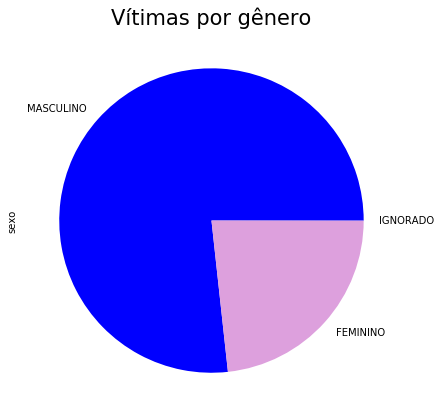

In [15]:
# gráfico de pizza utilizando o matplotlib.pyplot
df['sexo'].value_counts().plot.pie(figsize=(7,7),
                                    labels=['MASCULINO','FEMININO','IGNORADO'],
                                    colors=['blue','plum'])
plt.title('Vítimas por gênero', fontsize=21);

## Analisando a idade das vítimas

Quero gerar um histograma com as idades, separando em masculino e feminino. Mas quando realizamos a estatística descritiava acima observamos que o valor máximo para a variável idade foi de 2020, o que demonstra um erro na inserção nos dados. Vamos gerar um gráfico do tipo **box-plot** para verificar melhor os valores *outliers*.

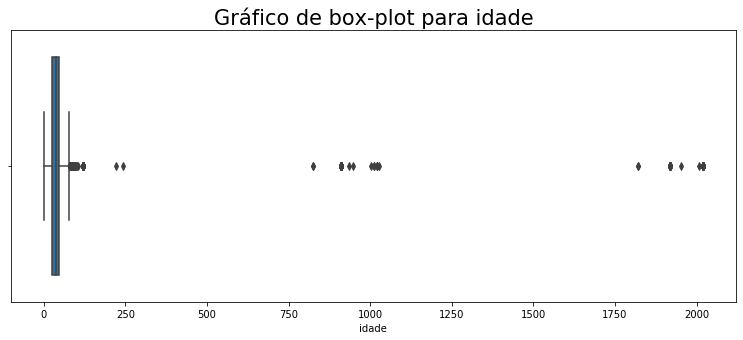

In [16]:
fig = plt.figure(figsize=(13,5))
plt.title('Gráfico de box-plot para idade', fontsize=21)
sns.boxplot(x='idade', data=df); # agora utilizamos a biblioteca seaborn

Como observado, há vários *outliers* que representam erros na hora de inserir a idade do indivíduo. Vamos fazer um filtro para as análises posteriores.

In [17]:
# número de pessoas acima de 120 anos
(df['idade']>=120).sum() 

158

In [18]:
# filtro selecionando apenas a idade abaixo de 120 anos
# dividindo entre masculino e feminino
masculino = df[(df['sexo'] == 'Masculino') & (df['idade'] <= 120)][['idade']]
feminino = df[(df['sexo'] == 'Feminino') & (df['idade'] <= 120)][['idade']]

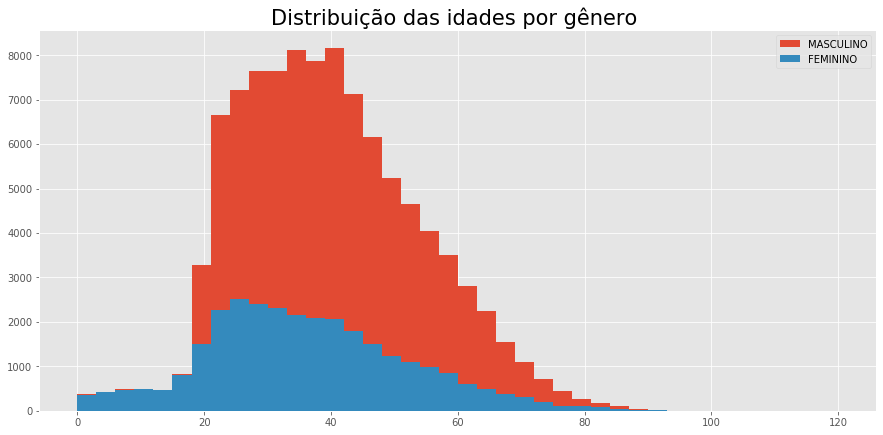

In [19]:
# gerando um histograma simples com o matplotlib
plt.style.use('ggplot') # utilizando o estilo ggplot
plt.figure(figsize=(15,7))
plt.hist(masculino['idade'],bins=40, label='MASCULINO')
plt.hist(feminino['idade'], bins=40, label='FEMININO')
plt.title('Distribuição das idades por gênero ',fontsize=21)
plt.legend();

In [20]:
# calculando a média de idade
print(f'Média da idade das vítimas masculinas: {masculino.idade.mean():.2f}')
print(f'Média da idade das vítimas femininas: {feminino.idade.mean():.2f}')

Média da idade das vítimas masculinas: 39.14
Média da idade das vítimas femininas: 35.55


## Classificação das vítimas

Agora veremos o tipo da vítima envolvido no acidente.

In [21]:
# tipos envolvidos
df['tipo_envolvido'].unique()

array(['Condutor', 'Passageiro', 'Pedestre', 'Cavaleiro'], dtype=object)

In [22]:
tipo_envolvido = pd.DataFrame(df['tipo_envolvido'].value_counts())
tipo_envolvido

,tipo_envolvido
Condutor,93730
Passageiro,34512
Pedestre,1955
Cavaleiro,22


In [23]:
# calculando o percentual de cada tipo
df['tipo_envolvido'].value_counts()/df['tipo_envolvido'].value_counts().sum()*100

Condutor      71.978744
Passageiro    26.503045
Pedestre       1.501317
Cavaleiro      0.016895
Name: tipo_envolvido, dtype: float64

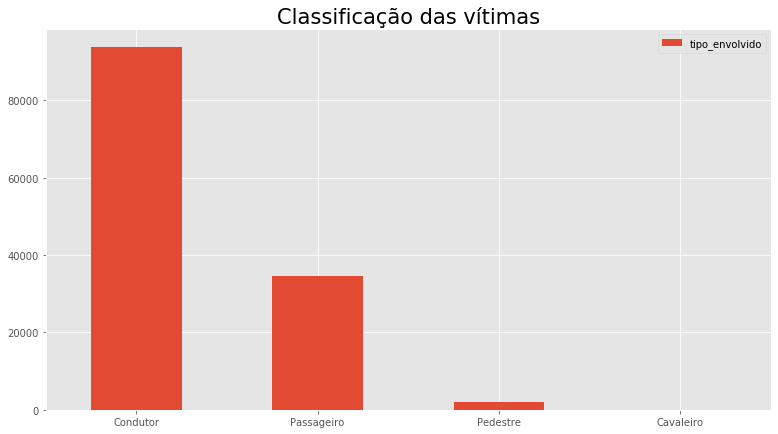

In [24]:
# gerando o gráfico de barras com cada tipo
tipo_envolvido.plot.bar(figsize=(13,7),rot=0)
plt.title('Classificação das vítimas',fontsize=21);

## Veículos das vítimas

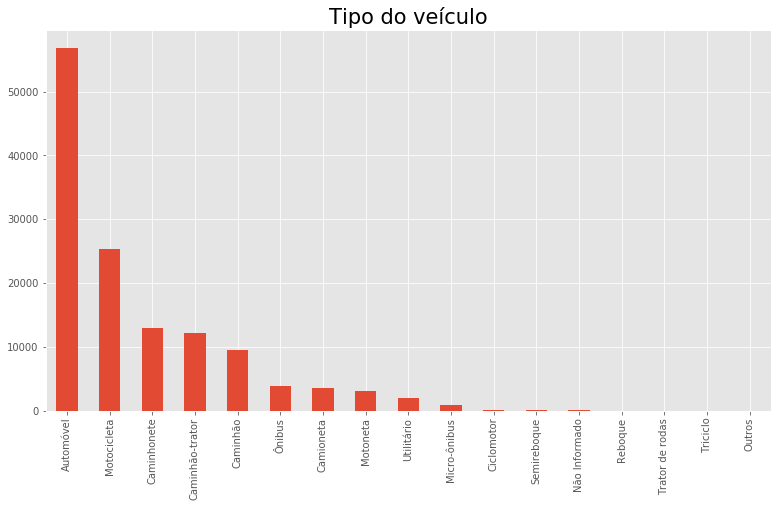

In [25]:
fig = plt.figure(figsize=(13,7))
df.tipo_veiculo.value_counts().plot.bar()
plt.title('Tipo do veículo',fontsize=21);

## Tipo do acidente

In [26]:
df['tipo_acidente'].unique()

array(['Tombamento', 'Colisão traseira', 'Colisão lateral',
       'Colisão frontal', 'Saída de leito carroçável', 'Incêndio',
       'Colisão transversal', 'Atropelamento de Pedestre',
       'Colisão lateral mesmo sentido', 'Engavetamento', 'Capotamento',
       'Colisão com objeto', 'Derramamento de carga',
       'Colisão lateral sentido oposto', 'Queda de ocupante de veículo',
       'Eventos atípicos', 'Atropelamento de Animal'], dtype=object)

In [27]:
tipo_acidente = pd.DataFrame(df.tipo_acidente.value_counts())
tipo_acidente

,tipo_acidente
Colisão traseira,30461
Colisão transversal,18321
Saída de leito carroçável,17055
Colisão lateral mesmo sentido,12582
Colisão frontal,12358
Colisão com objeto,7490
Tombamento,7364
Engavetamento,4702
Atropelamento de Pedestre,4468
Colisão lateral sentido oposto,4369


## Acidentes com vítimas fatais

Vamos fazer uma análise filtrando apenas os acidentes onde teve vítimas fatais.

In [28]:
# selecionando apenas os acidentes com vítimas fatais
acidentes_fatais = df.loc[df['classificacao_acidente']=='Com Vítimas Fatais']

In [29]:
acidentes_fatais.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
9,331864.0,738673.0,2021-01-01,sexta-feira,17:10:00,SC,470.0,"79,1",INDAIAL,Transitar na contramão,...,Feminino,0,1,0,0,"-26,951565","-49,306534",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
10,331864.0,738672.0,2021-01-01,sexta-feira,17:10:00,SC,470.0,"79,1",INDAIAL,Transitar na contramão,...,Masculino,0,1,0,0,"-26,951565","-49,306534",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
15,331920.0,738637.0,2021-01-01,sexta-feira,20:40:00,PR,116.0,59,CAMPINA GRANDE DO SUL,Entrada inopinada do pedestre,...,Masculino,1,0,0,0,"-25,30335724","-48,94378885",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
28,331990.0,739047.0,2021-01-02,sábado,09:41:00,MG,381.0,"531,5",ITATIAIUCU,Condutor Dormindo,...,Masculino,0,1,0,0,"-20,18182886","-44,37895835",SPRF-MG,DEL04-MG,UOP03-DEL04-MG
29,331990.0,738864.0,2021-01-02,sábado,09:41:00,MG,381.0,"531,5",ITATIAIUCU,Condutor Dormindo,...,Masculino,0,0,0,1,"-20,18182886","-44,37895835",SPRF-MG,DEL04-MG,UOP03-DEL04-MG


In [30]:
# definindo a coluna com a data como índice para posterior análise
acidentes_fatais = acidentes_fatais.set_index('data_inversa')

In [31]:
# verificando o tipo dos dados do índice
type(acidentes_fatais.index)

pandas.core.indexes.base.Index

In [32]:
# transformando o índice para o tipo datetime
acidentes_fatais.index = pd.to_datetime(acidentes_fatais.index)
type(acidentes_fatais.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [33]:
# agrupando os acidentes por mês
# utilizamos o tipo datetime do índice para selecionar apenas os meses com .month
mortes_mes = pd.DataFrame(data=acidentes_fatais.groupby(acidentes_fatais.index.month)['mortos'].sum().values,
                columns=['Mortes'],
                index=['janeiro','fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'])
mortes_mes

,Mortes
janeiro,407
fevereiro,298
março,339
abril,312
maio,369
junho,355
julho,442
agosto,377
setembro,397
outubro,414


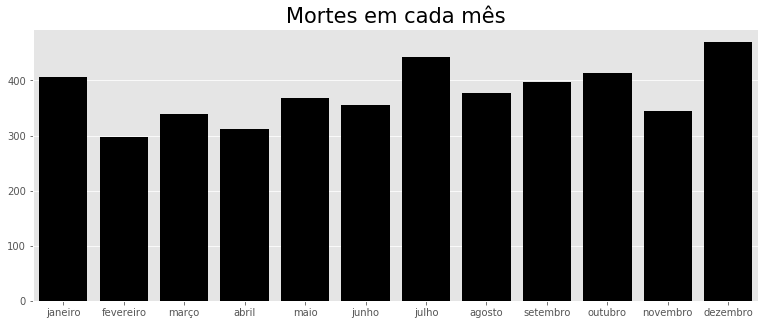

In [34]:
fig = plt.figure(figsize=(13,5))
plt.title('Mortes em cada mês',fontsize=21)
sns.barplot(x=mortes_mes.index, y=mortes_mes.Mortes,color="black") # gráfico de barras com o seaborn
plt.ylabel('')
plt.xlabel('');

In [35]:
# calculando as mortes por dia na semana
mortes_dia = pd.DataFrame(acidentes_fatais.groupby('dia_semana')['mortos'].sum())
mortes_dia

,mortos
dia_semana,
domingo,898
quarta-feira,513
quinta-feira,522
segunda-feira,561
sexta-feira,677
sábado,861
terça-feira,492


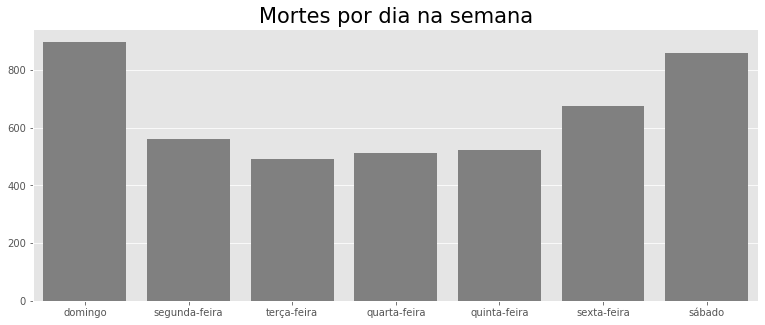

In [36]:
fig = plt.figure(figsize=(13,5))
plt.title('Mortes por dia na semana',fontsize=21)
sns.barplot(x=mortes_dia.index, y=mortes_dia.mortos,color="gray",
            order=['domingo','segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado'])
plt.ylabel('')
plt.xlabel('');

In [37]:
# horário em que ocorrem a maior parte dos acidentes fatais
fase_dia = pd.DataFrame(acidentes_fatais.fase_dia.value_counts())
fase_dia

,fase_dia
Plena Noite,5433
Pleno dia,5123
Amanhecer,779
Anoitecer,641


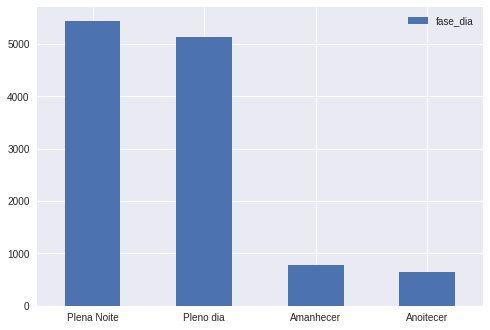

In [38]:
# A maior parte dos acidentes ocorrem à noite
plt.style.use('seaborn')
fase_dia.plot.bar(rot=0)
plt.legend();